# Data Mining Project Phase 1

## PART I

In [ ]:
# !pip install pandas
# !pip install numpy
# !pip install statistics
# !pip install matplotlib
# !pip install pycountry
# !pip install countrydetails
!pip install Countrydetails
# !pip install mlxtend
# !pip install scipy
# !pip install plotly
# !pip install scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 2.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from statistics import mode
import matplotlib.pyplot as plt
import re
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2


In [ ]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")
new_df = df.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Create table for feature of Data

In [ ]:
table = pd.DataFrame(index=list(df.columns), columns=["type", "range", "Min", "Max", "Mean", "Mode", "Median", "Outlier"])
x = df.select_dtypes(include=['int64', 'float64'])

for attr in x.keys():
  table['Min'][attr] = np.min(df[attr])
  table['Max'][attr] = np.max(df[attr])
  table['Mean'][attr] = np.mean(df[attr])
  table['Mode'][attr] = mode(df[attr])
  table['Median'][attr] = np.median(df[attr])
  table['range'][attr] = [table['Min'][attr], table['Max'][attr]]
  if table['Min'][attr] == 0 and table['Max'][attr] == 1:
    table['type'][attr] = "binary"

  elif table['Min'][attr] != 0 and table['Max'][attr] != 1:
    table['type'][attr] = "numric"

    data = df[attr]
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = 1.5 * iqr
    outliers = np.where((data < q1 - threshold) | (data > q3 + threshold))
    for outlier in outliers[0]:
      table['Outlier'][attr] = df[attr][outlier]

table.dropna(subset=['type'], inplace=True)
table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,type,range,Min,Max,Mean,Mode,Median,Outlier
Age,numric,"[18, 90]",18,90,53.707977,90,54.0,NaN
Cholesterol,numric,"[120, 400]",120,400,259.877211,235,259.0,NaN
Heart Rate,numric,"[40, 110]",40,110,75.021682,94,75.0,NaN
Diabetes,binary,"[0, 1]",0,1,0.652288,1,1.0,NaN
Family History,binary,"[0, 1]",0,1,0.492982,0,0.0,NaN
Smoking,binary,"[0, 1]",0,1,0.896839,1,1.0,NaN
Obesity,binary,"[0, 1]",0,1,0.501426,1,1.0,NaN
Alcohol Consumption,binary,"[0, 1]",0,1,0.598083,1,1.0,NaN
Exercise Hours Per Week,numric,"[0.002442348, 19.99870905]",0.002442,19.998709,10.014284,4.168189,10.069559,NaN
Previous Heart Problems,binary,"[0, 1]",0,1,0.495835,0,0.0,NaN


### Boxplot for each Data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


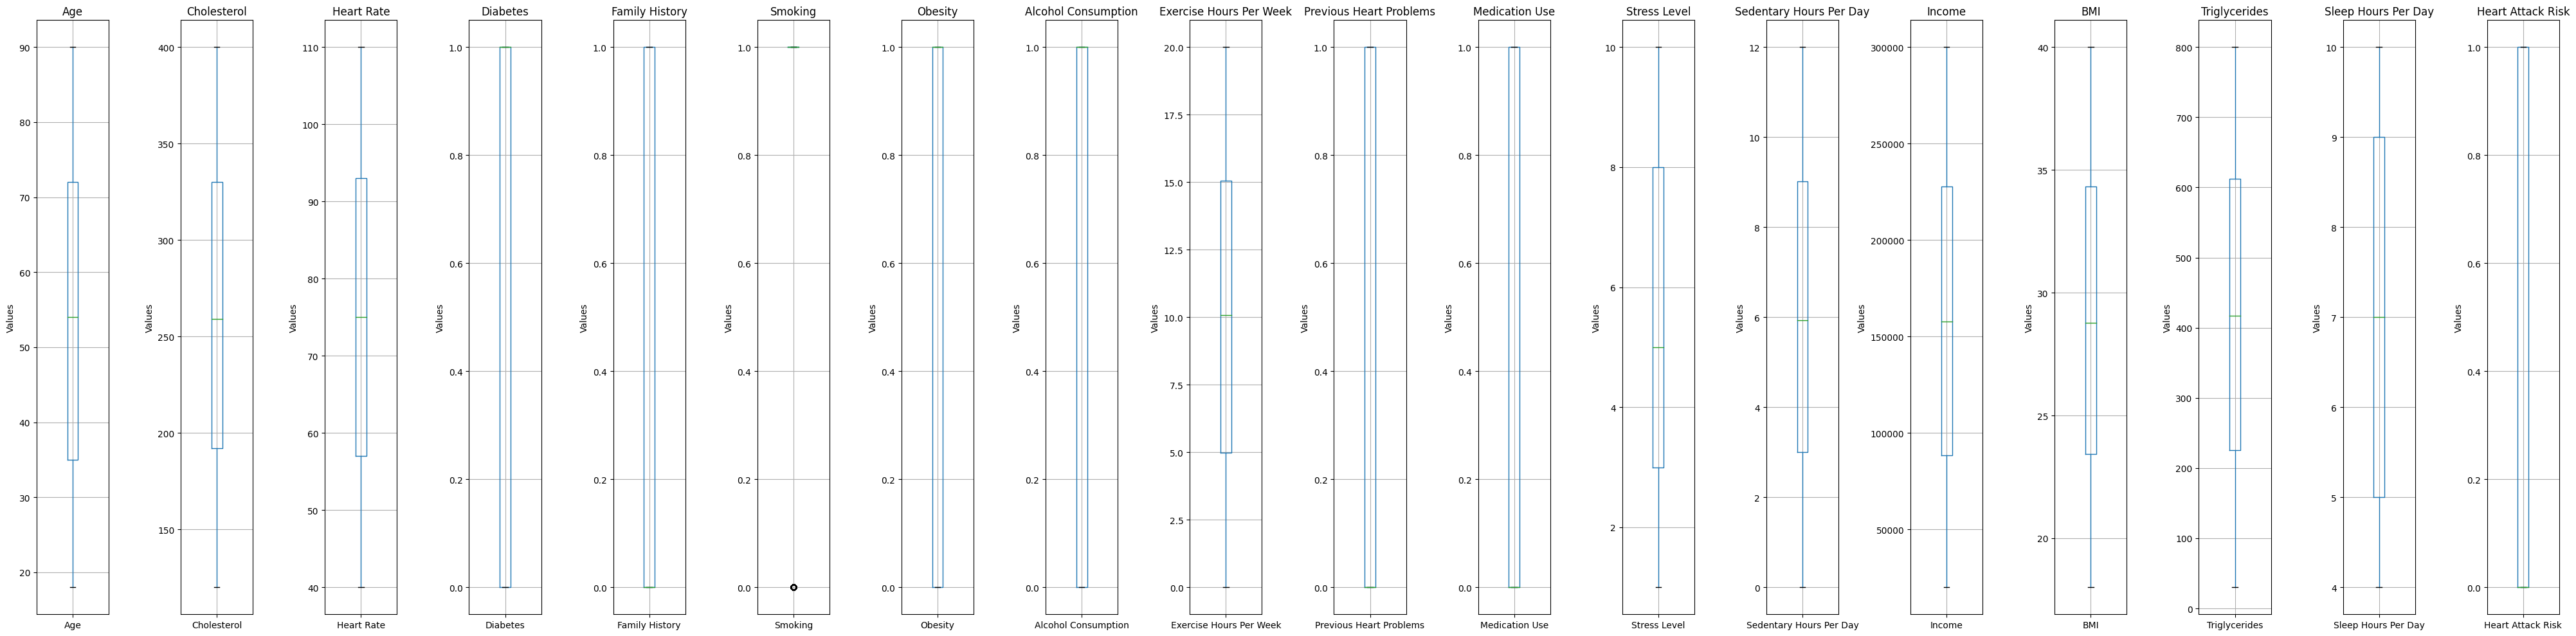

In [ ]:
plt.figure(figsize=(40,10))
for i, attr in enumerate(table.index):
  plt.subplot(1, len(table.index),i + 1)
  df.boxplot(column=df[attr].name)
  plt.title(df[attr].name)
  plt.ylabel('Values')

plt.tight_layout()
plt.show()


## PART II

In [ ]:
quality_table = pd.DataFrame(index=list(df.columns), columns=["No.records", "No.Null", "Accuracy", "Completeness", "Validity", "Currentness", "Consistency"])
columns_to_check = df.columns


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
split_blood_pr = new_df['Blood Pressure'].str.split('/', expand=True)
systolic = pd.to_numeric(split_blood_pr[0])
diastolic = pd.to_numeric(split_blood_pr[1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Number of records

In [ ]:
for column in columns_to_check:
  quality_table['No.records'][column] = len(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Missing values


In [ ]:
# missing values

missing_values = {}
for column in columns_to_check:
    missing_values[column] = df[df[column].isna()]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Valid values

In [ ]:
# valid values
def pattern_validation(inp, pattern):
  return inp.str.match(pattern)
def boundary_validation(inp, start, end):
  return ((inp >= start) & (inp <= end))
def isin_validation(inp, range):
  return inp.isin(range)


invalid_values = {}

for column in columns_to_check:
  if column=='Patient ID':
    invalid_values[column] = df[~pattern_validation(df['Patient ID'],'[A-Z]{3}[0-9]{4}')]
  elif column == 'Country':
    invalid_values[column] = df[~pattern_validation(df['Country'],'[A-Z]*[a-z]*')]
  elif column == 'Age':
    invalid_values[column] = df[~boundary_validation(df['Age'],0,120)]
  elif column == 'Cholesterol':
    invalid_values[column] = df[~boundary_validation(df['Cholesterol'],0,500)]
  elif column == 'Heart Rate':
    invalid_values[column] = df[~boundary_validation(df['Heart Rate'],40,200)]

  elif column == 'Stress Level':
    invalid_values[column] = df[~boundary_validation(df['Stress Level'],1,10)]
  elif column == 'Sedentary Hours Per Day':
    invalid_values[column] = df[~boundary_validation(df['Sedentary Hours Per Day'],0,24)]
  elif column == 'Income':
    invalid_values[column] = df[~boundary_validation(df['Income'],10000,1000000)]
  elif column == 'BMI':
    invalid_values[column] = df[~boundary_validation(df['BMI'],10,40)]
  elif column == 'Triglycerides':
    invalid_values[column] = df[~boundary_validation(df['Triglycerides'],0,1000)]

  elif column == 'Physical Activity Days Per Week':
    invalid_values[column] = df[~boundary_validation(df['Physical Activity Days Per Week'],0,7)]
  elif column == 'Exercise Hours Per Week':
    invalid_values[column] = df[~boundary_validation(df['Exercise Hours Per Week'],0,24)]
  elif column == 'Sleep Hours Per Day':
    invalid_values[column] = df[~boundary_validation(df['Sleep Hours Per Day'],0,24)]

  elif column == 'Diabetes':
    invalid_values[column] = df[~isin_validation(df['Diabetes'],[0,1])]
  elif column == 'Family History':
    invalid_values[column] = df[~isin_validation(df['Family History'],[0,1])]
  elif column == 'Smoking':
    invalid_values[column] = df[~isin_validation(df['Smoking'],[0,1])]

  elif column == 'Obesity':
    invalid_values[column] = df[~isin_validation(df['Obesity'],[0,1])]
  elif column == 'Alcohol Consumption':
    invalid_values[column] = df[~isin_validation(df['Alcohol Consumption'],[0,1])]
  elif column == 'Previous Heart Problems':
    invalid_values[column] = df[~isin_validation(df['Previous Heart Problems'],[0,1])]
  elif column == 'Medication Use':
    invalid_values[column] = df[~isin_validation(df['Medication Use'],[0,1])]
  elif column == 'Heart Attack Risk':
    invalid_values[column] = df[~isin_validation(df['Heart Attack Risk'],[0,1])]

  elif column == 'Sex':
    invalid_values[column] = df[~isin_validation(df['Sex'],['Male', 'Female'])]
  elif column == 'Diet':
    invalid_values[column] = df[~isin_validation(df['Diet'],['Healthy','Average','Unhealthy'])]
  elif column == 'Continent':
    invalid_values[column] = df[~isin_validation(df['Continent'],['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Australia', 'Antarctica'])]
  elif column == 'Hemisphere':
    invalid_values[column] = df[~isin_validation(df['Hemisphere'],['Northern Hemisphere', 'Southern Hemisphere'])]

  elif column == 'Blood Pressure':
    invalid_values[column] = df[~((systolic >= 90) & (systolic <= 200) & (diastolic >= 60) & (diastolic <=120))]

invalid_values


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Patient ID':      Patient ID  Age     Sex  Cholesterol Blood Pressure  Heart Rate  \
 328      Jan-49   60    Male          147        114/103         101   
 664      Mar-99   89  Female          348         120/90          95   
 2068     May-58   26    Male          203         146/82          62   
 6005     10-Jun   83    Male          239          91/61          43   
 8723     Jul-72   67    Male          292         106/92          58   
 
       Diabetes  Family History  Smoking  Obesity  ...  \
 328          1               1        1        0  ...   
 664          0               1        1        1  ...   
 2068         1               1        1        1  ...   
 6005         0               0        1        1  ...   
 8723         1               1        1        1  ...   
 
       Sedentary Hours Per Day  Income        BMI  Triglycerides  \
 328                 11.615252  140911  26.324861            624   
 664                  5.069367  202919  35.102826           

### Number of Nulls

In [ ]:
for column in columns_to_check:
  quality_table['No.Null'][column] = df[column].isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Validity

In [ ]:
dlen = len(df)

for item in invalid_values:
  quality_table['Validity'][item] = (1-(len(invalid_values[item].index)/dlen)) *100

quality_table


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No.records,No.Null,Accuracy,Completeness,Validity,Currentness,Consistency
Patient ID,8763,0,NaN,NaN,99.942942,NaN,NaN
Age,8763,0,NaN,NaN,100.0,NaN,NaN
Sex,8763,0,NaN,NaN,100.0,NaN,NaN
Cholesterol,8763,0,NaN,NaN,100.0,NaN,NaN
Blood Pressure,8763,0,NaN,NaN,100.0,NaN,NaN
Heart Rate,8763,0,NaN,NaN,100.0,NaN,NaN
Diabetes,8763,0,NaN,NaN,100.0,NaN,NaN
Family History,8763,0,NaN,NaN,100.0,NaN,NaN
Smoking,8763,0,NaN,NaN,100.0,NaN,NaN
Obesity,8763,0,NaN,NaN,100.0,NaN,NaN


### Completeness

In [ ]:
# completeness
for item in missing_values:
  quality_table['Completeness'][item] = (1-(missing_values[item].size/dlen))*100

quality_table



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No.records,No.Null,Accuracy,Completeness,Validity,Currentness,Consistency
Patient ID,8763,0,NaN,100.0,99.942942,NaN,NaN
Age,8763,0,NaN,100.0,100.0,NaN,NaN
Sex,8763,0,NaN,100.0,100.0,NaN,NaN
Cholesterol,8763,0,NaN,100.0,100.0,NaN,NaN
Blood Pressure,8763,0,NaN,100.0,100.0,NaN,NaN
Heart Rate,8763,0,NaN,100.0,100.0,NaN,NaN
Diabetes,8763,0,NaN,100.0,100.0,NaN,NaN
Family History,8763,0,NaN,100.0,100.0,NaN,NaN
Smoking,8763,0,NaN,100.0,100.0,NaN,NaN
Obesity,8763,0,NaN,100.0,100.0,NaN,NaN


### Accuracy

In [ ]:
for column in columns_to_check:
  quality_table['Accuracy'][column] = (1-(missing_values[column].size + len(invalid_values[column].index)/dlen))*100

quality_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No.records,No.Null,Accuracy,Completeness,Validity,Currentness,Consistency
Patient ID,8763,0,99.942942,100.0,99.942942,NaN,NaN
Age,8763,0,100.0,100.0,100.0,NaN,NaN
Sex,8763,0,100.0,100.0,100.0,NaN,NaN
Cholesterol,8763,0,100.0,100.0,100.0,NaN,NaN
Blood Pressure,8763,0,100.0,100.0,100.0,NaN,NaN
Heart Rate,8763,0,100.0,100.0,100.0,NaN,NaN
Diabetes,8763,0,100.0,100.0,100.0,NaN,NaN
Family History,8763,0,100.0,100.0,100.0,NaN,NaN
Smoking,8763,0,100.0,100.0,100.0,NaN,NaN
Obesity,8763,0,100.0,100.0,100.0,NaN,NaN


### Currentness


In [ ]:
for column in columns_to_check:
  quality_table['Currentness'][column] = 1

quality_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No.records,No.Null,Accuracy,Completeness,Validity,Currentness,Consistency
Patient ID,8763,0,99.942942,100.0,99.942942,1,NaN
Age,8763,0,100.0,100.0,100.0,1,NaN
Sex,8763,0,100.0,100.0,100.0,1,NaN
Cholesterol,8763,0,100.0,100.0,100.0,1,NaN
Blood Pressure,8763,0,100.0,100.0,100.0,1,NaN
Heart Rate,8763,0,100.0,100.0,100.0,1,NaN
Diabetes,8763,0,100.0,100.0,100.0,1,NaN
Family History,8763,0,100.0,100.0,100.0,1,NaN
Smoking,8763,0,100.0,100.0,100.0,1,NaN
Obesity,8763,0,100.0,100.0,100.0,1,NaN


### Consistency

In [ ]:
# Previous Heart Problems vs Heart Attack Risk
inconsistent_heart_risk = df[(df['Previous Heart Problems'] == 1) & (df['Heart Attack Risk'] == 0)]
inconsistent_heart_risk

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
10,HSD6283,73,Female,373,107/69,97,1,1,1,0,...,8.919879,50030,22.867911,469,0,4,South Africa,Africa,Southern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8742,AEX7905,35,Male,323,164/74,84,1,0,1,0,...,11.389512,174193,34.378134,761,5,5,Australia,Australia,Southern Hemisphere,0
8748,GQZ5013,81,Male,137,143/64,61,1,0,1,1,...,6.766948,50533,35.074391,191,3,10,Spain,Europe,Southern Hemisphere,0
8752,UBM5982,65,Male,150,152/99,106,1,0,1,0,...,7.325356,55934,22.710546,83,1,5,Argentina,South America,Southern Hemisphere,0
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0


In [ ]:
obese_patients = df[df['Obesity'] == 1]

inconsistent_obesity = obese_patients[(obese_patients['BMI'] < 30)]
inconsistent_obesity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
7,XXM0972,84,Male,220,131/68,107,0,0,1,1,...,10.543780,122093,22.221862,370,6,7,Japan,Asia,Northern Hemisphere,1
9,FTJ5456,43,Female,248,160/70,55,0,1,1,1,...,4.055115,209703,22.558917,232,7,7,Japan,Asia,Northern Hemisphere,0
16,DXB2434,69,Male,379,173/75,40,1,1,1,1,...,9.060509,267997,28.332747,68,3,6,Brazil,South America,Southern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8743,FPL5366,64,Female,338,173/105,79,1,1,1,1,...,5.365595,88834,25.534554,93,6,4,Brazil,South America,Southern Hemisphere,0
8750,FDK8693,34,Female,304,102/92,93,0,1,0,1,...,6.900037,223874,22.418494,791,4,5,China,Asia,Northern Hemisphere,0
8751,SVO4635,75,Male,176,102/89,78,0,0,1,1,...,6.634988,228009,23.793280,748,5,8,Spain,Europe,Southern Hemisphere,1
8753,NVC8704,82,Male,311,126/108,87,0,1,1,1,...,8.402977,141521,27.694240,515,1,5,Australia,Australia,Southern Hemisphere,1


In [ ]:
inconsistent_sedentary = df[(df['Sedentary Hours Per Day'] + df['Sleep Hours Per Day'] > 24)]
inconsistent_sedentary


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk


In [ ]:
from Countrydetails import countries
inconsistent_country = 0
def check_continent(row):
  country = countries.all_countries()
  for item in country.continents():
    if not (row['Country'] == item['country'] and row['Continent'] == item['continent']):
      # print(row.name)
      pass
    else :
      global inconsistent_country
      inconsistent_country += 1

new_df.apply(check_continent , axis=1)
print(inconsistent_country)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


7879


In [ ]:
quality_table['Consistency']['Heart Attack Risk'] = (1-(len(inconsistent_heart_risk.index)/dlen))*100
quality_table['Consistency']['Sedentary Hours Per Day'] = (1-(len(inconsistent_sedentary.index)/dlen))*100

quality_table['Consistency']['Obesity'] = (1 - (len(inconsistent_obesity.index) / dlen)) * 100

quality_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No.records,No.Null,Accuracy,Completeness,Validity,Currentness,Consistency
Patient ID,8763,0,99.942942,100.0,99.942942,1,NaN
Age,8763,0,100.0,100.0,100.0,1,NaN
Sex,8763,0,100.0,100.0,100.0,1,NaN
Cholesterol,8763,0,100.0,100.0,100.0,1,NaN
Blood Pressure,8763,0,100.0,100.0,100.0,1,NaN
Heart Rate,8763,0,100.0,100.0,100.0,1,NaN
Diabetes,8763,0,100.0,100.0,100.0,1,NaN
Family History,8763,0,100.0,100.0,100.0,1,NaN
Smoking,8763,0,100.0,100.0,100.0,1,NaN
Obesity,8763,0,100.0,100.0,100.0,1,71.596485


In [ ]:
duplicate_ids = df[df.duplicated(subset=['Patient ID'], keep=False)]

if duplicate_ids.empty:
    print("No duplicate IDs found.")
else:
    print("Duplicate IDs found:")
    print(duplicate_ids[['Patient ID']])

No duplicate IDs found.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## PART III

### Create new features and normalize

In [ ]:
new_df["Exercise Hours Per Week"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       0.208326
1       0.090557
2       0.103815
3       0.491376
4       0.290147
          ...   
8758    0.395819
8759    0.827954
8760    0.157329
8761    0.189411
8762    0.904134
Name: Exercise Hours Per Week, Length: 8763, dtype: float64

In [ ]:
def reverse_value(value):
    return 1 - value

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
health_targets = ['Exercise Hours Per Week', 'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Sedentary Hours Per Day']
for target in health_targets:
  new_df[target] = (new_df[target] - new_df[target].min()) / (new_df[target].max() - new_df[target].min())
  if target == 'Sedentary Hours Per Day':
    new_df[target].apply(reverse_value)

unhealth_targets = ['Smoking', 'Obesity', 'Alcohol Consumption']
previous_illness_targets = ['Diabetes', 'Family History', 'Previous Heart Problems']

new_df['UnHealth Behavior Score'] = new_df[unhealth_targets].mean(axis=1)
new_df['Health Behavior Score'] = new_df[health_targets].mean(axis=1)
new_df['Disease background'] = new_df[previous_illness_targets].mean(axis=1)
# new_df


0       0.551234
1       0.413584
2       0.788642
3       0.637413
4       0.126150
          ...   
8758    0.900572
8759    0.319366
8760    0.197861
8761    0.002320
8762    0.750453
Name: Sedentary Hours Per Day, Length: 8763, dtype: float64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Data Reduction : Delete Irrelevant attributes

In [ ]:
def encode_sex(value):
  if value == 'Male':
    return 1
  else :
    return 0

def encode_hemisphere(value):
  if value == 'Northern Hemisphere':
    return 1
  else:
    return 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
new_df['Sex'] = new_df['Sex'].apply(encode_sex)
new_df['Hemisphere'] = new_df['Hemisphere'].apply(encode_hemisphere)
new_df = pd.get_dummies(new_df, columns=['Diet', 'Country', 'Continent'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-26-4ed229c65349>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = new_df.corr()['Heart Attack Risk']


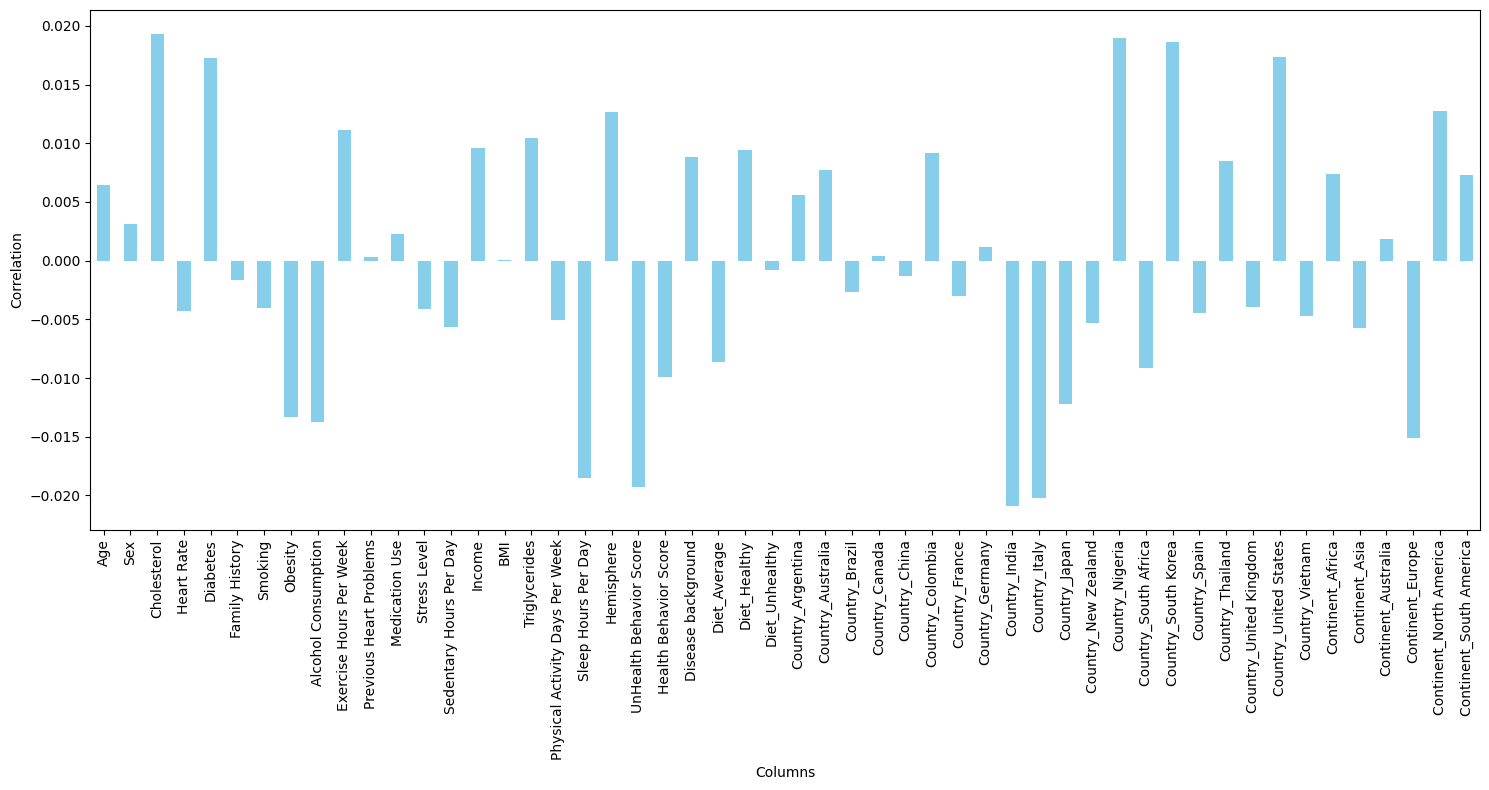

In [ ]:
correlation = new_df.corr()['Heart Attack Risk']
correlation = correlation.drop(index='Heart Attack Risk', axis=0)

plt.figure(figsize=(15, 8))
correlation.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Correlation')
plt.tight_layout()
plt.show()


In [ ]:
# drop Irrelative column
del new_df['BMI']
new_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Country_Thailand,Country_United Kingdom,Country_United States,Country_Vietnam,Continent_Africa,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,1,121,94/76,61,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
8759,QSV6764,28,0,120,157/102,73,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8760,XKA5925,47,1,250,161/75,105,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
8761,EPE6801,36,1,178,119/67,60,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### change the column names by NLTK

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

new_columns = [
    ' '.join([word for word in col.split('Country_') if word.lower() not in stop_words])
    if 'Country_' in col
    else ' '.join([word for word in col.split('Continent_') if word.lower() not in stop_words])
    if 'Continent_' in col
    else col
    for col in new_df.columns
]
new_df.columns = new_columns

new_df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Thailand,United Kingdom,United States,Vietnam,Africa,Asia,Australia,Europe,North America,South America
0,BMW7812,67,1,208,158/88,72,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,CZE1114,21,1,389,165/93,98,1,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,BNI9906,21,0,324,174/99,72,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,JLN3497,84,1,383,163/100,73,1,1,1,0,...,0,0,0,0,0,0,0,0,1,0
4,GFO8847,66,1,318,91/88,93,1,1,1,1,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,1,121,94/76,61,1,1,1,0,...,1,0,0,0,0,1,0,0,0,0
8759,QSV6764,28,0,120,157/102,73,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8760,XKA5925,47,1,250,161/75,105,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
8761,EPE6801,36,1,178,119/67,60,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1


### Visualzie Dataset columns on available values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


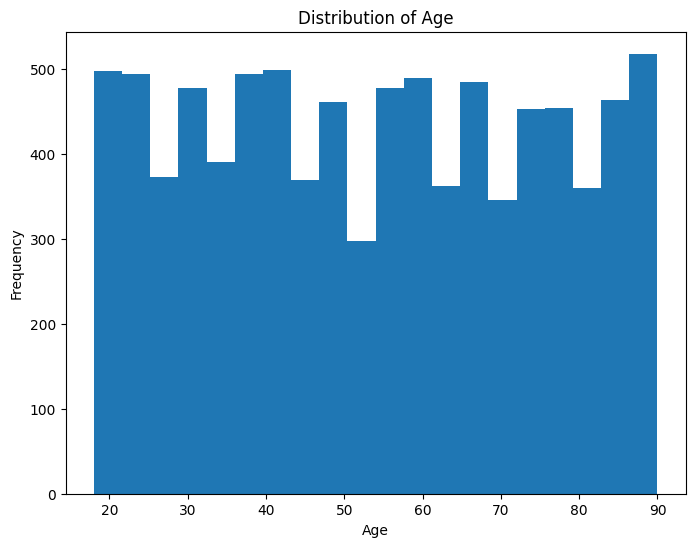

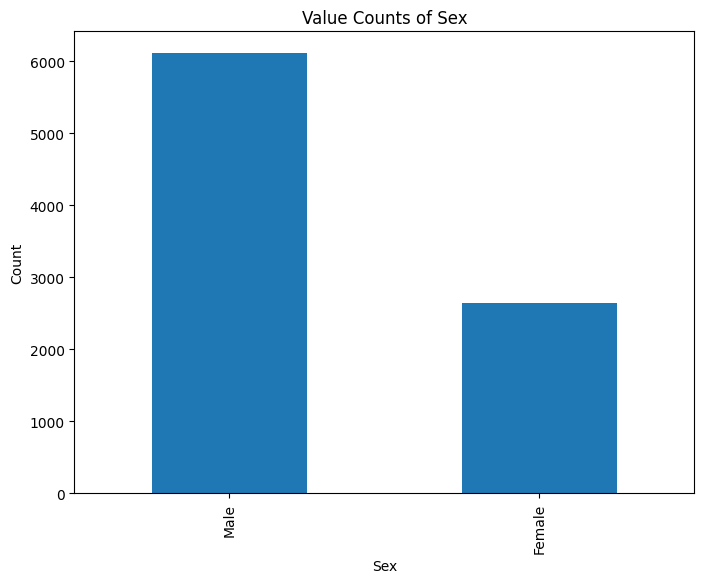

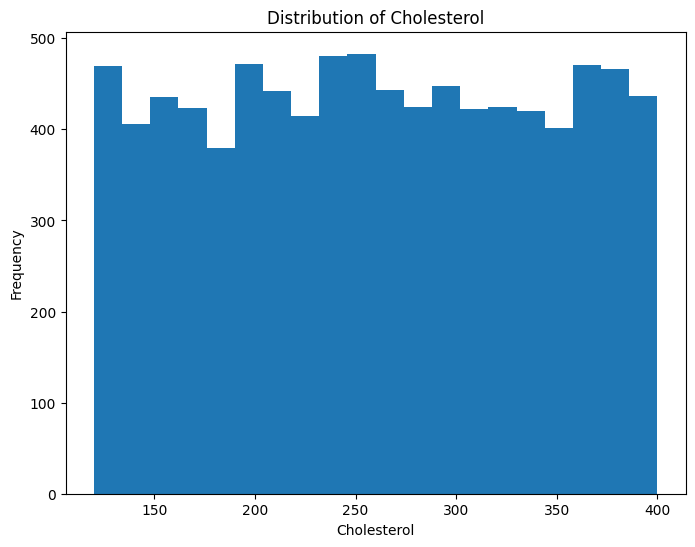

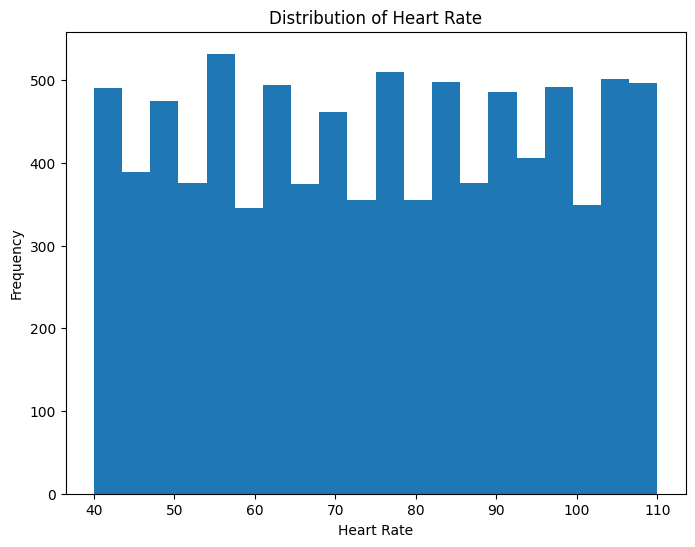

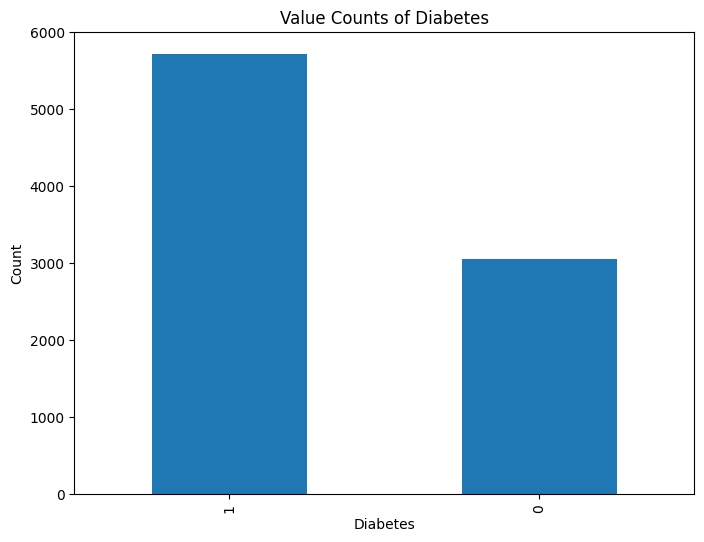

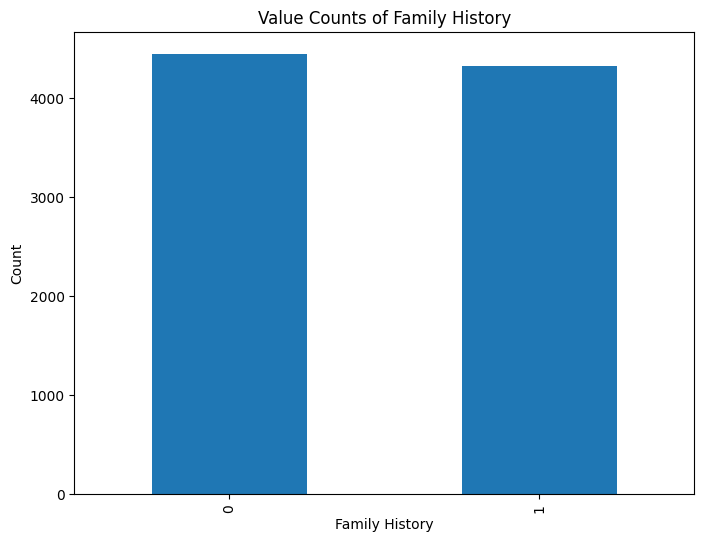

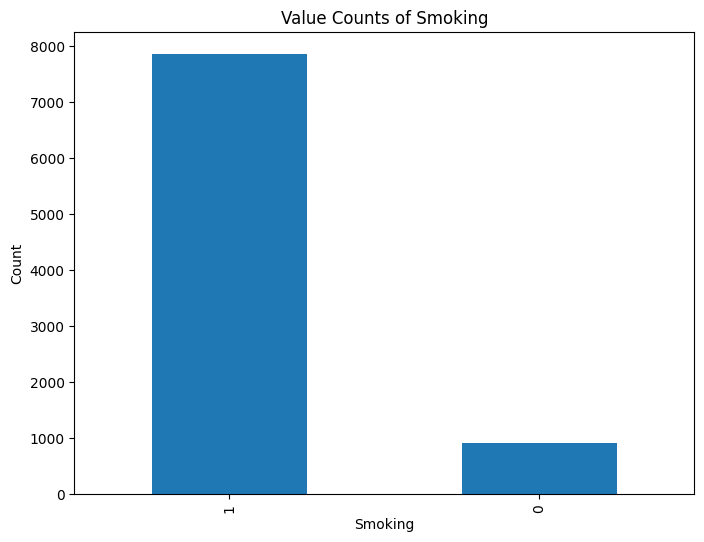

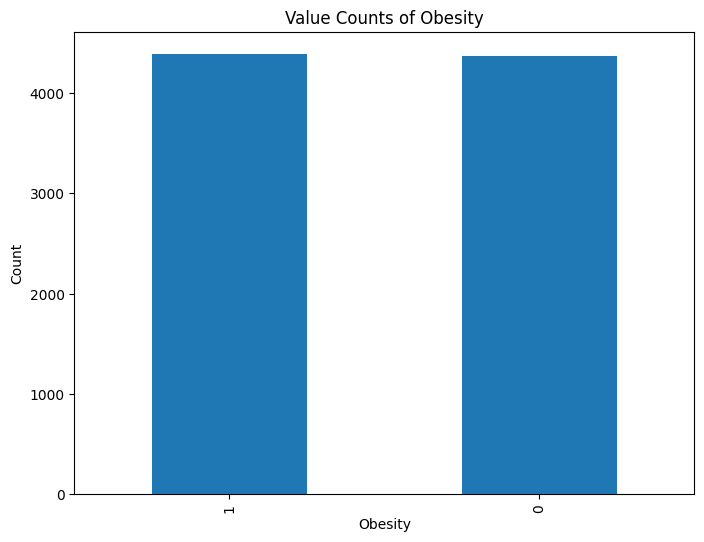

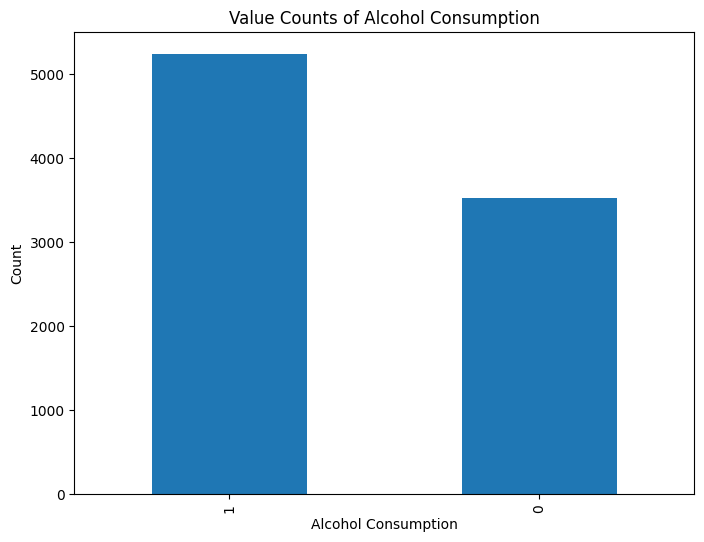

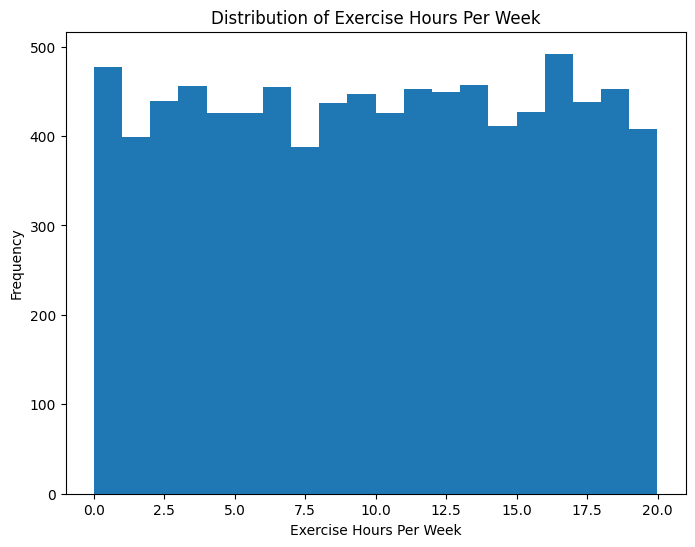

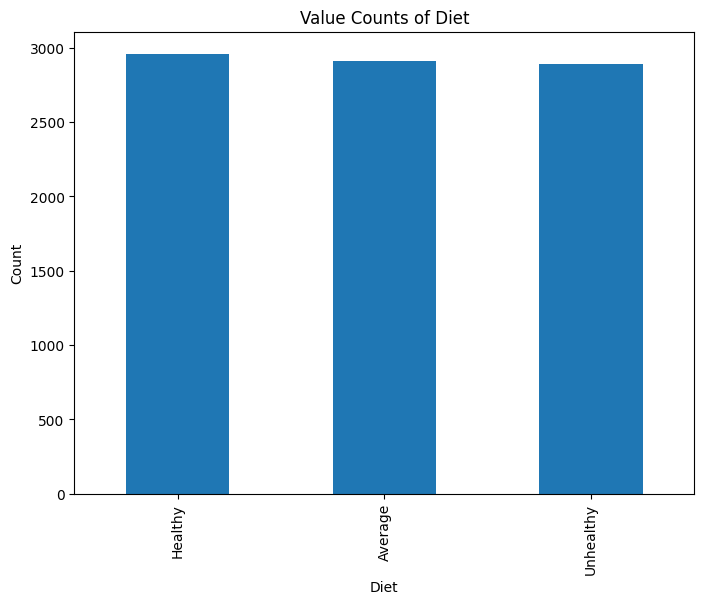

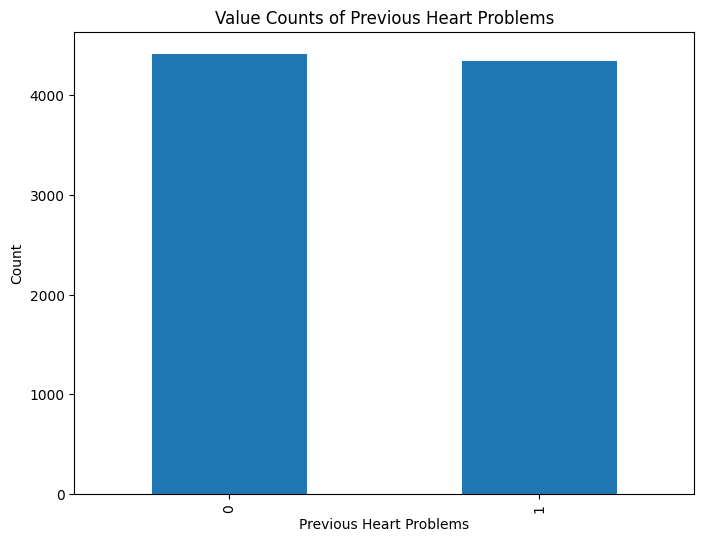

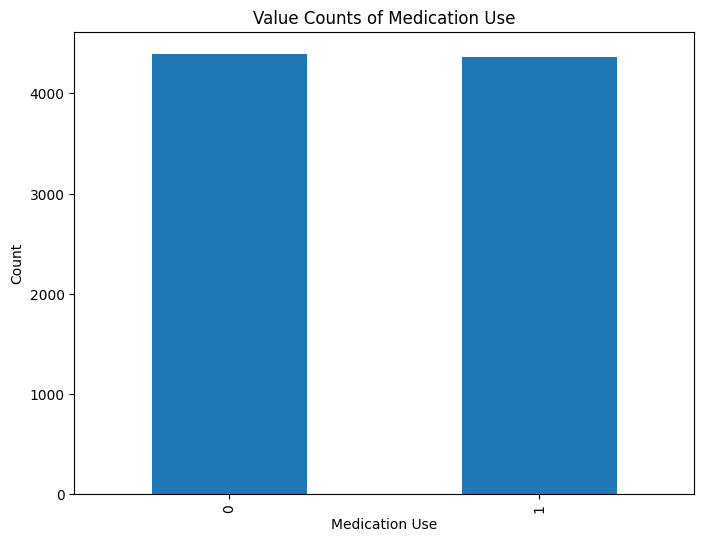

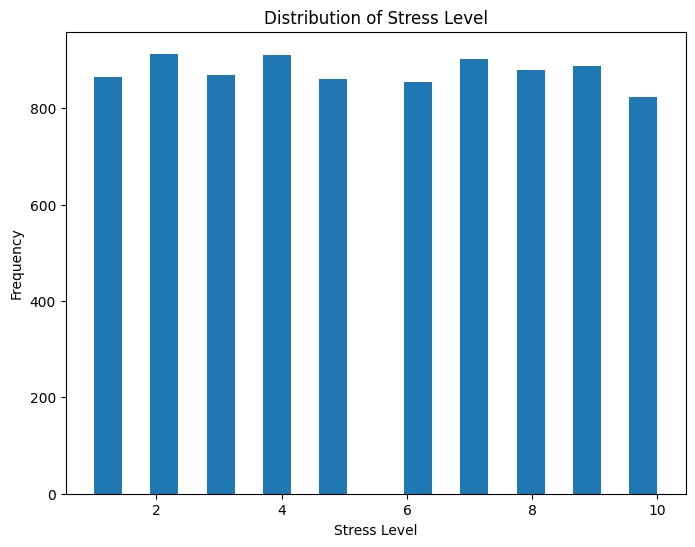

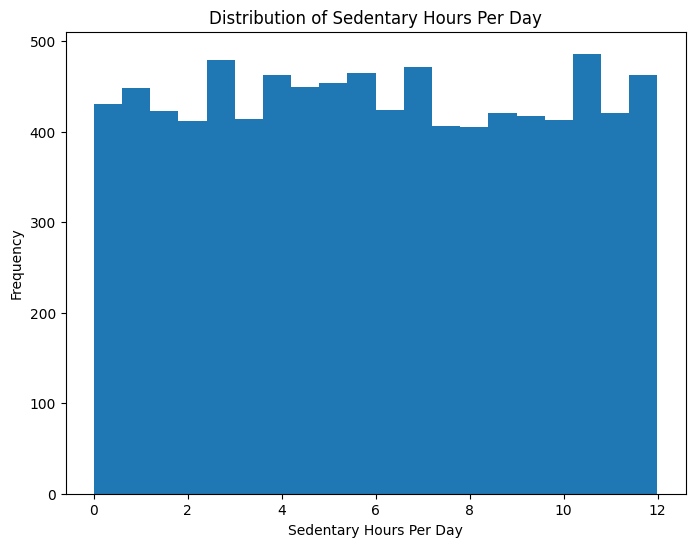

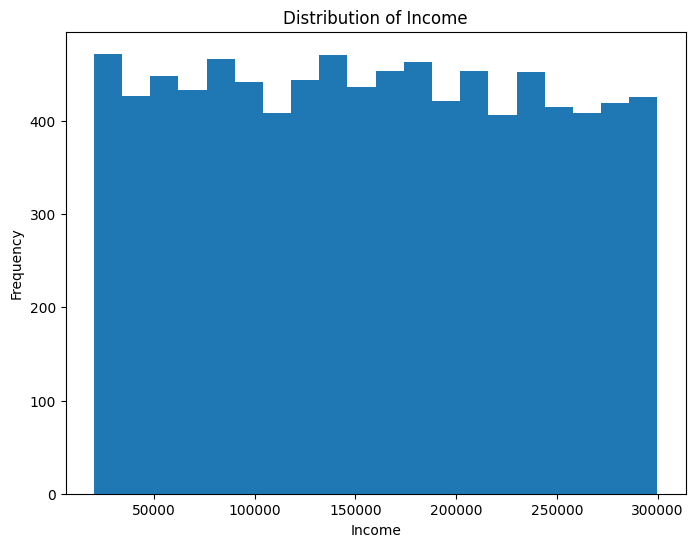

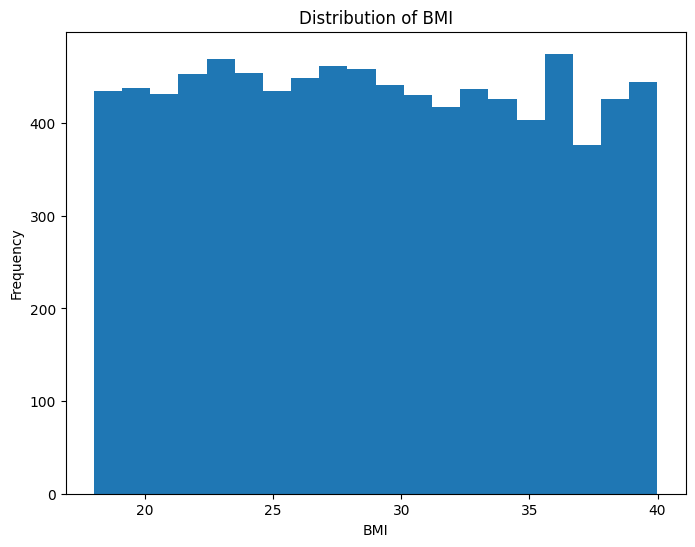

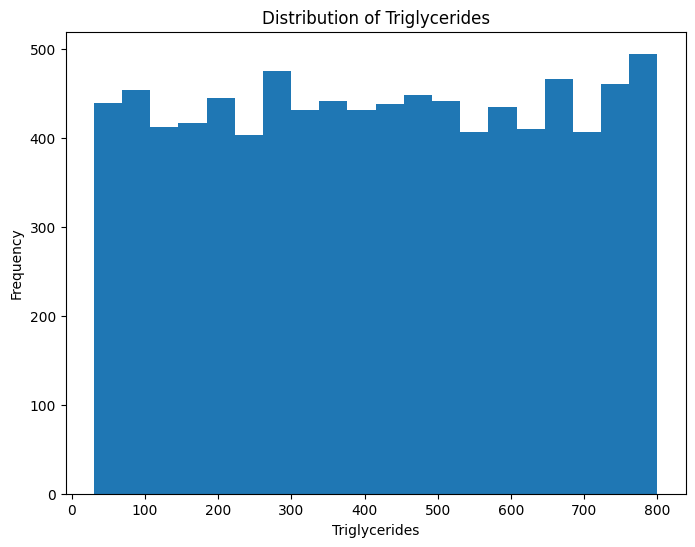

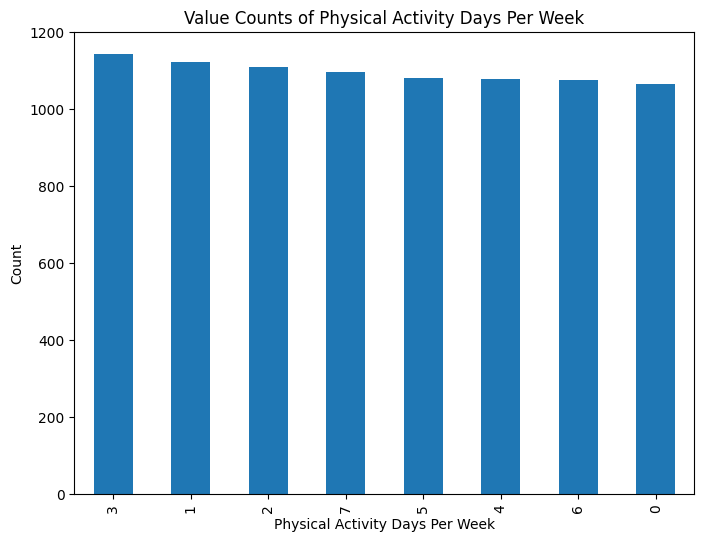

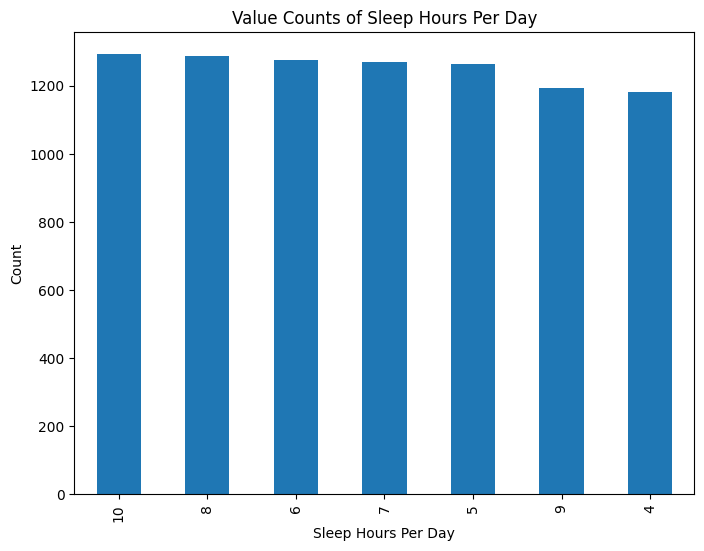

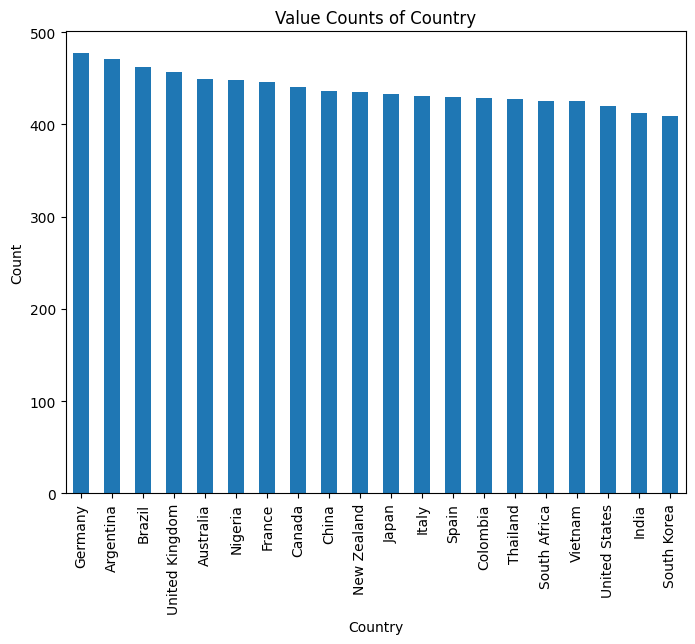

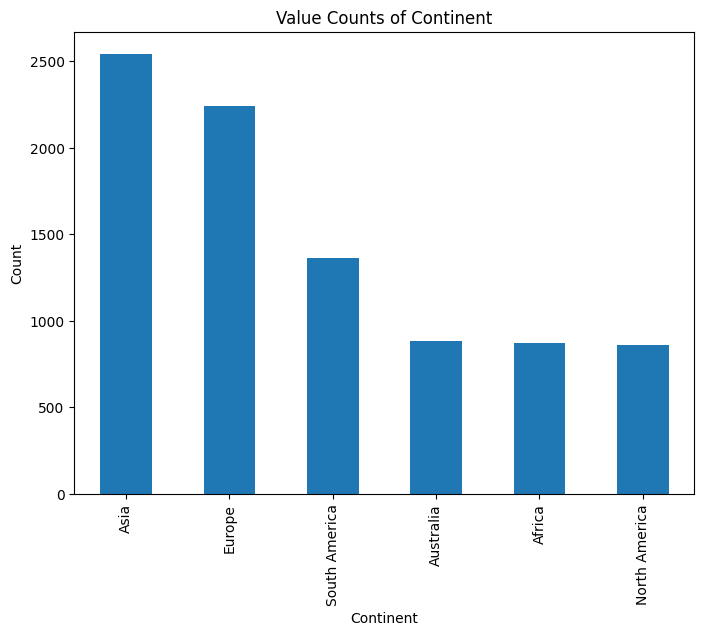

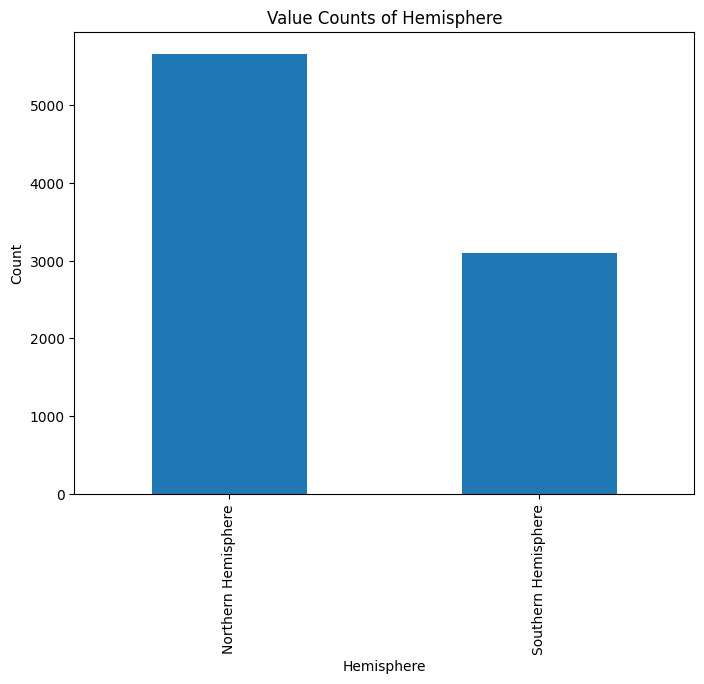

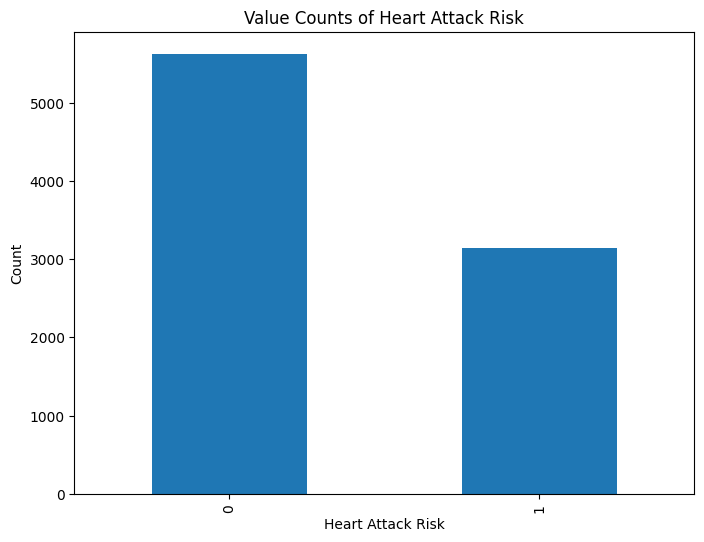

In [ ]:
for column in df.columns:
  if column != 'Patient ID' and column != 'Blood Pressure':
      if df[column].dtype == 'object' or df[column].nunique() < 10:
          value_counts = df[column].value_counts()
          value_counts.plot(kind='bar', figsize=(8, 6))
          plt.title(f'Value Counts of {column}')
          plt.xlabel(column)
          plt.ylabel('Count')
          plt.show()
      else:
          df[column].plot(kind='hist', bins=20, figsize=(8, 6))
          plt.title(f'Distribution of {column}')
          plt.xlabel(column)
          plt.ylabel('Frequency')
          plt.show()

# PHASE 2

In [ ]:
invalid_patient_id = invalid_values['Patient ID']
indices_to_delete = (inconsistent_heart_risk.index).union(
    inconsistent_obesity.index).union(invalid_patient_id.index)

clean_df = df.drop(indices_to_delete)
clean_df['Heart Attack Risk'] = clean_df['Heart Attack Risk'].map({0: 'Low', 1: 'High'})

clean_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,Low
5,ZOO7941,54,Female,297,172/86,48,1,1,1,0,...,7.798752,241339,20.146839,795,5,10,Germany,Europe,Northern Hemisphere,High
6,WYV0966,90,Male,358,102/73,84,0,0,1,0,...,0.627356,190450,28.885811,284,4,10,Canada,North America,Northern Hemisphere,High
8,XCQ5937,20,Male,145,144/105,68,1,0,1,1,...,11.348787,25086,35.809901,790,7,4,Brazil,South America,Southern Hemisphere,Low
11,YSP0073,71,Male,374,158/71,70,1,1,1,1,...,7.227338,163066,32.485345,523,4,8,United States,North America,Northern Hemisphere,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,KQR8949,25,Male,307,137/94,78,0,1,1,0,...,10.516775,79211,33.469360,296,7,5,Spain,Europe,Southern Hemisphere,Low
8756,BUE0416,22,Male,347,115/87,108,0,1,1,0,...,6.786750,230235,20.295054,641,2,9,Canada,North America,Northern Hemisphere,High
8757,YDX2478,59,Female,378,93/78,99,0,1,1,1,...,7.495231,70415,39.976061,158,1,9,China,Asia,Northern Hemisphere,Low
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,High


## PART I
  frequent patterns

In [ ]:
def get_frequent_itemsets(col1, col2, **kwargs):
  data = clean_df[[col1, col2]].copy()
  if kwargs['continuous'] == True:
    data[col1] = pd.cut(data[col1], bins=kwargs['bins'],
                           labels=kwargs['labels'])

  # Convert columns to strings
  data[col1] = data[col1].astype(str)
  data[col2] = data[col2].astype(str)

  # Create a list of lists (transactions) for Apriori
  transactions = data[[col1, col2]].values.tolist()

  # Apply one-hot encoding
  te = TransactionEncoder()
  te_ary = te.fit(transactions).transform(transactions, sparse=True)
  df_encoded = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)

  # Apply Apriori algorithm
  frequent_itemsets = apriori(df_encoded, min_support=0.1, use_colnames=True, verbose=1)
  frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

  return frequent_itemsets


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### 1.1. Age vs Heart Attack Risk

In [ ]:
frequent_itemsets = get_frequent_itemsets('Age',  'Heart Attack Risk', continuous=True,
                                          bins=[0, 30, 50, 70, 120],
                                          labels=['0-30', '31-50', '51-70', '71+'])
frequent_itemsets


Processing 12 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.187339,(0-30),1
1,0.273768,(31-50),1
2,0.264891,(51-70),1
3,0.274001,(71+),1
4,0.532119,(High),1
5,0.467881,(Low),1
6,0.100444,"(0-30, High)",2
7,0.145060,"(High, 31-50)",2
8,0.128708,"(Low, 31-50)",2
9,0.138285,"(51-70, High)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.3)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### 1.2. Sex vs Heart Attack Risk

In [ ]:
frequent_itemsets = get_frequent_itemsets('Sex', 'Heart Attack Risk', continuous=False )
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 9 combinations | Sampling itemset size 3


,support,itemsets,length
0,0.302266,(Female),1
1,0.532119,(High),1
2,0.467881,(Low),1
3,0.697734,(Male),1
4,0.164915,"(High, Female)",2
5,0.137351,"(Low, Female)",2
6,0.367204,"(High, Male)",2
7,0.330530,"(Low, Male)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.3)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(High),(Male),0.532119,0.697734,0.367204,0.690079,0.989029,-0.004073,0.975300,-0.023160
1,(Male),(High),0.697734,0.532119,0.367204,0.526281,0.989029,-0.004073,0.987676,-0.035401
2,(Low),(Male),0.467881,0.697734,0.330530,0.706440,1.012478,0.004073,1.029657,0.023160
3,(Male),(Low),0.697734,0.467881,0.330530,0.473719,1.012478,0.004073,1.011093,0.040772


In [ ]:
rules[ (rules['confidence'] > 0.7) ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(Low),(Male),0.467881,0.697734,0.33053,0.70644,1.012478,0.004073,1.029657,0.02316


### 1.3. Cholesterol vs Heart Attack Risk

In [ ]:
frequent_itemsets = get_frequent_itemsets('Cholesterol', 'Heart Attack Risk', continuous=True,
                                          bins=[120, 200, 400],
                                            labels=['120-200', '201-400'])
frequent_itemsets


Processing 6 combinations | Sampling itemset size 3


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets,length
0,0.271665,(120-200),1
1,0.723896,(201-400),1
2,0.532119,(High),1
3,0.467881,(Low),1
4,0.139921,"(High, 120-200)",2
5,0.131745,"(Low, 120-200)",2
6,0.390096,"(201-400, High)",2
7,0.333801,"(201-400, Low)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.35)

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(201-400),(High),0.723896,0.532119,0.390096,0.538884,1.012713,0.004897,1.014671,0.045466
1,(High),(201-400),0.532119,0.723896,0.390096,0.733099,1.012713,0.004897,1.034481,0.026830


In [ ]:
rules[ (rules['confidence'] > 0.6)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(High),(201-400),0.532119,0.723896,0.390096,0.733099,1.012713,0.004897,1.034481,0.02683


if we say min confidenece is 60% and min support is 30% then we have this two rules:
High -> (201-400)

### **ERR** 1.4. Blood pressure vs Heart Attack Risk

In [ ]:
data = clean_df[['Blood Pressure', 'Heart Attack Risk']].copy()

data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

data['Systolic'] = pd.to_numeric(data['Systolic'])
data['Diastolic'] = pd.to_numeric(data['Diastolic'])

data['Systolic_Category'] = pd.cut(data['Systolic'], bins=[0, 120, 130, 140, 160, 200], labels=['0-20', '120-130', '130-140', '140-160', '160-200'])
data['Diastolic_Category'] = pd.cut(data['Diastolic'], bins=[0, 80, 90, 95, 100, 120], labels=['0-80', '80-90', '90-95', '95-100', '100-120'])

data['Systolic_Category'] = data['Systolic_Category'].astype(str)
data['Diastolic_Category'] = data['Diastolic_Category'].astype(str)
data['Heart Attack Risk'] = data['Heart Attack Risk'].astype(str)

transactions = data[['Systolic_Category', 'Diastolic_Category', 'Heart Attack Risk']].values.tolist()

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.337304,(0-20)
1,0.402476,(0-80)
2,0.196449,(100-120)
3,0.109320,(120-130)
4,0.113291,(130-140)
...,...,...
90,0.016819,"(Low, 160-200, 80-90)"
91,0.013315,"(90-95, High, 160-200)"
92,0.011212,"(90-95, 160-200, Low)"
93,0.010979,"(95-100, High, 160-200)"


In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.3)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### 1.5. Family History vs Heart Attack Risk

In [ ]:
frequent_itemsets = get_frequent_itemsets('Family History', 'Heart Attack Risk', continuous=False)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 6 combinations | Sampling itemset size 3


,support,itemsets,length
0,0.506190,(0),1
1,0.493810,(1),1
2,0.532119,(High),1
3,0.467881,(Low),1
4,0.271432,"(0, High)",2
5,0.234758,"(0, Low)",2
6,0.260687,"(High, 1)",2
7,0.233123,"(Low, 1)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.3)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### 1.6. Smoking vs Heart Attack *Risk*

In [ ]:
frequent_itemsets = get_frequent_itemsets('Smoking', 'Heart Attack Risk', continuous=False)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 3 combinations | Sampling itemset size 3


,support,itemsets,length
0,0.103013,(0),1
1,0.896987,(1),1
2,0.532119,(High),1
3,0.467881,(Low),1
4,0.473254,"(High, 1)",2
5,0.423733,"(Low, 1)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.45)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(High),(1),0.532119,0.896987,0.473254,0.889377,0.991516,-0.004049,0.931208,-0.017960
1,(1),(High),0.896987,0.532119,0.473254,0.527604,0.991516,-0.004049,0.990443,-0.076693


In [ ]:
rules [ rules['confidence'] > 0.6 ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(High),(1),0.532119,0.896987,0.473254,0.889377,0.991516,-0.004049,0.931208,-0.01796


**WTF**

### 1.7. Obesity vs Heart Attack Risk

In [ ]:
frequent_itemsets = get_frequent_itemsets('Obesity', 'Heart Attack Risk', continuous=False)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 6 combinations | Sampling itemset size 3


,support,itemsets,length
0,0.700771,(0),1
1,0.299229,(1),1
2,0.532119,(High),1
3,0.467881,(Low),1
4,0.372109,"(0, High)",2
5,0.328662,"(0, Low)",2
6,0.160009,"(High, 1)",2
7,0.139220,"(Low, 1)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.35)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(0),(High),0.700771,0.532119,0.372109,0.531000,0.997898,-0.000784,0.997615,-0.006991
1,(High),(0),0.532119,0.700771,0.372109,0.699298,0.997898,-0.000784,0.995101,-0.004482


In [ ]:
rules [ rules['confidence'] > 0.6 ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(High),(0),0.532119,0.700771,0.372109,0.699298,0.997898,-0.000784,0.995101,-0.004482


**WTF**

### 1.8. Alcohol Consumption vs Heart Attack Risk

In [ ]:
frequent_itemsets = get_frequent_itemsets('Alcohol Consumption', 'Heart Attack Risk', continuous=False)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 6 combinations | Sampling itemset size 3


,support,itemsets,length
0,0.398505,(0),1
1,0.601495,(1),1
2,0.532119,(High),1
3,0.467881,(Low),1
4,0.214202,"(0, High)",2
5,0.184303,"(0, Low)",2
6,0.317916,"(High, 1)",2
7,0.283579,"(Low, 1)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.3)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(High),(1),0.532119,0.601495,0.317916,0.597454,0.993282,-0.00215,0.989961,-0.01425
1,(1),(High),0.601495,0.532119,0.317916,0.528544,0.993282,-0.00215,0.992417,-0.01669


In [ ]:
rules [ rules['confidence'] > 0.55 ]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(High),(1),0.532119,0.601495,0.317916,0.597454,0.993282,-0.00215,0.989961,-0.01425


### 1.9. Exercise Hours Per Week vs Heart Attack Risk

In [ ]:
frequent_itemsets = get_frequent_itemsets('Exercise Hours Per Week', 'Heart Attack Risk', continuous=True,
                                          bins=[0, 5, 10, 14, 20],
                                          labels=['0-5', '6-10', '11-14', '15-20']
                                          )
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 12 combinations | Sampling itemset size 3


,support,itemsets,length
0,0.251343,(0-5),1
1,0.209530,(11-14),1
2,0.305536,(15-20),1
3,0.233590,(6-10),1
4,0.532119,(High),1
5,0.467881,(Low),1
6,0.128708,"(High, 0-5)",2
7,0.122635,"(Low, 0-5)",2
8,0.113758,"(11-14, High)",2
9,0.167017,"(High, 15-20)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.3)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### 1.10. Diet vs Heart Attack Risk

In [ ]:
frequent_itemsets = get_frequent_itemsets('Diet', 'Heart Attack Risk', continuous=False)

frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 18 combinations | Sampling itemset size 3


,support,itemsets,length
0,0.329829,(Average),1
1,0.334268,(Healthy),1
2,0.532119,(High),1
3,0.467881,(Low),1
4,0.335903,(Unhealthy),1
5,0.171689,"(High, Average)",2
6,0.158141,"(Low, Average)",2
7,0.183602,"(High, Healthy)",2
8,0.150666,"(Low, Healthy)",2
9,0.176828,"(Unhealthy, High)",2


In [ ]:
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.3)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


# Part II

### Clustering

##### Numeric to Categorical for Clustering

In [ ]:
update_df = df.copy()

update_df["Age"] = update_df["Age"].astype(int)
update_df["Age"] = pd.cut(update_df["Age"], bins=[0, 30, 50, 70, 120], labels=['0-30', '30-50', '50-70', '70-120'], right=False)

update_df["Cholesterol"] = update_df["Cholesterol"].astype(int)
update_df["Cholesterol"] = pd.cut(update_df["Cholesterol"], bins=[0, 120, 200, 400], labels=['0-120', '120-200', '201-400'], right=False)

update_df["Exercise Hours Per Week"] = update_df["Exercise Hours Per Week"].astype(int)
update_df["Exercise Hours Per Week"] = pd.cut(update_df["Exercise Hours Per Week"], bins=[0, 5, 10, 14, 20], labels=['0-5', '6-10', '11-14', '15-20'], right=False)

update_df["Heart Rate"] = update_df["Heart Rate"].astype(int)
update_df["Heart Rate"] = pd.cut(update_df["Heart Rate"], bins=[0, 60, 90, 110], labels=['0-60', '60-90', '90+'], right=False)

update_df["Stress Level"] = update_df["Stress Level"].astype(int)
update_df["Stress Level"] = pd.cut(update_df["Stress Level"], bins=[0, 3, 6, 10], labels=['0-3', '3-6', '6-10'], right=False)

update_df["Sedentary Hours Per Day"] = update_df["Sedentary Hours Per Day"].astype(int)
update_df["Sedentary Hours Per Day"] = pd.cut(update_df["Sedentary Hours Per Day"], bins=[0, 6, 12, 24], labels=['0-6', '6-12', '12-24'], right=False)

update_df["Income"] = update_df["Income"].astype(int)
update_df["Income"] = pd.cut(update_df["Income"], bins=[0, 50000, 100000, float('inf')], labels=['0-50k', '50k-100k', '100k-150k'], right=False)

update_df["BMI"] = update_df["BMI"].astype(int)
update_df["BMI"] = pd.cut(update_df["BMI"], bins=[0, 18, 25, 30, 100], labels=['0-18', '18-25', '25-30', '30+'], right=False)

update_df["Physical Activity Days Per Week"] = update_df["Physical Activity Days Per Week"].astype(int)
update_df["Physical Activity Days Per Week"] = pd.cut(update_df["Physical Activity Days Per Week"], bins=[0, 2, 4, float('inf')], labels=['0-2', '2-4', '4-7'], right=False)

update_df["Sleep Hours Per Day"] = update_df["Sleep Hours Per Day"].astype(int)
update_df["Sleep Hours Per Day"] = pd.cut(update_df["Sleep Hours Per Day"], bins=[0, 6, 12, 24], labels=['0-6', '6-12', '12-24'], right=False)

update_df["Triglycerides"] = update_df["Triglycerides"].astype(int)
update_df["Triglycerides"] = pd.cut(update_df["Triglycerides"], bins=[0, 200, 500, 800], labels=['0-200', '200-500', '500-800'], right=False)

columns_change_to_bool = ['Diabetes', 'Family History', 'Smoking', 'Alcohol Consumption',
                  'Previous Heart Problems', 'Heart Attack Risk','Medication Use', 'Obesity']

for col in columns_change_to_bool:
  update_df[col] = update_df[col].astype(bool)

update_df['Sex'] = update_df['Sex'].replace({1: True, 0: False})
update_df['Sex'] = update_df['Sex'].astype(bool)

del update_df['Blood Pressure']
del update_df["Patient ID"]
del update_df["Continent"]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Kmeans Algorithm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


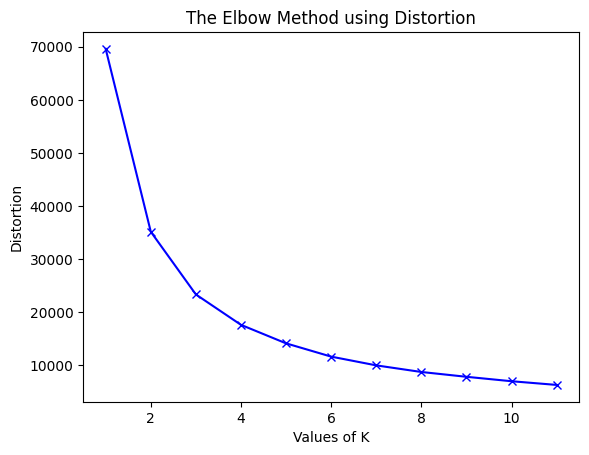

In [ ]:
distortions = []
inertias = {}
mapping1 = {}
mapping2 = {}
K = range(1, 12)

kmeans_check_df = new_df.copy()
del kmeans_check_df["Patient ID"]
del kmeans_check_df["Blood Pressure"]

x_train = kmeans_check_df

for k in K:
    kmeanModel = KMeans(n_clusters=k, n_init=15).fit(x_train)
    distortions.append(sum(np.min(cdist(x_train, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / x_train.shape[0])
    inertias[k] = kmeanModel.inertia_
    mapping1[k] = sum(np.min(cdist(x_train, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / x_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


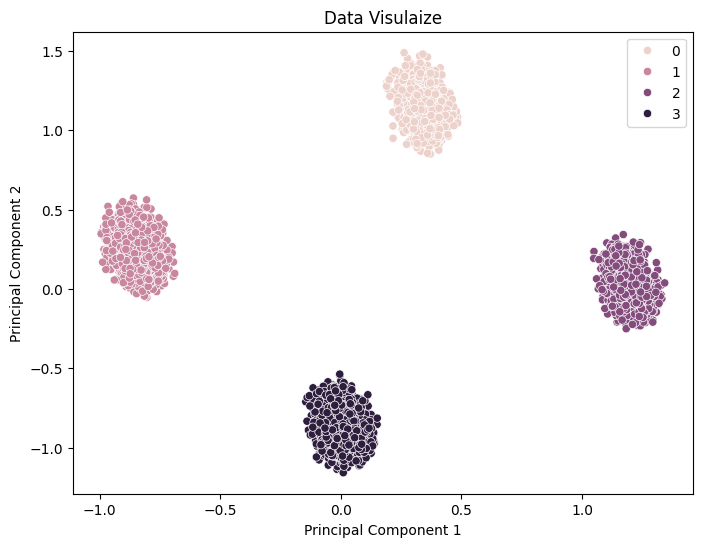

In [ ]:
K = 4
df_dummies = pd.get_dummies(update_df)
kmeans = KMeans(n_clusters=K, max_iter=100, n_init=20, random_state=42)
kmeans_labels = kmeans.fit_predict(df_dummies)
pca = PCA(n_components=3)
temp = pca.fit_transform(df_dummies)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=temp[:, 0], y=temp[:, 1], hue=kmeans_labels)
plt.title('Data Visulaize')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


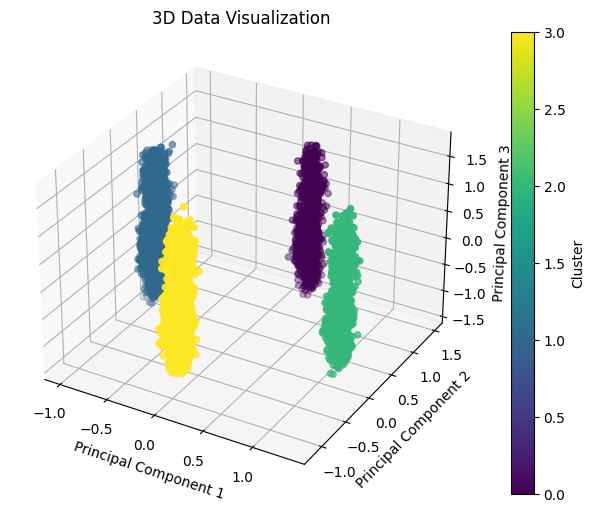

In [ ]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(temp[:, 0], temp[:, 1], temp[:, 2], c=kmeans_labels, cmap='viridis')

ax.set_title('3D Data Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')

plt.show()

#### Find frequent pattern in each cluster

In [ ]:
result_set = set()

for i in range(K):
  # print(f"cluster status {i}")
  cluster_df = df_dummies[kmeans_labels == i]
  for index, col in enumerate(cluster_df.columns):
      if len(cluster_df.columns) != index:
        for index1 in range(index + 1):
          if cluster_df[col].dtype == "bool" and cluster_df[cluster_df.columns[index1]].dtype == "bool":
            frequent = get_frequent_itemsets(col, cluster_df.columns[index1], continuous=False)
            rules = association_rules(frequent, metric='support', min_threshold=0.5)
            if not rules.empty:
                result_set.add((col, cluster_df.columns[index1], i, tuple(map(tuple, rules.to_numpy()))))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Processing 2 combinations | Sampling itemset size 2
Processing 6 combinations | Sampling itemset size 3
Processing 2 combinations | Sampling itemset size 2
Processing 6 combinations | Sampling itemset size 3
Processing 2 combinations | Sampling itemset size 2
Processing 2 combinations | Sampling itemset size 2
Processing 6 combinations | Sampling itemset size 3
Processing 2 combinations | Sampling itemset size 2
Processing 2 combinations | Sampling itemset size 2
Processing 2 combinations | Sampling itemset size 2
Processing 3 combinations | Sampling itemset size 3
Processing 2 combinations | Sampling itemset size 2
Processing 2 combinations | Sampling itemset size 2
Processing 2 combinations | Sampling itemset size 2
Processing 2 combinations | Sampling itemset size 2
Processing 6 combinations | Sampling itemset size 3
Processing 2 combinations | Sampling itemset size 2
Processing 2 combinations | Sampling itemset size 2
Processing 2 combinations | Sampling itemset size 2
Processing 2

#### Extracted pattern from Clustering

In [ ]:
print("Rules Extracted from Clustering:")
for result_tuple in result_set:
    col, col2, cluster_number, filtered_df_tuple = result_tuple
    print(f"Cluster {cluster_number} Rules for {col} and {col2}:")

    for rule in filtered_df_tuple:
      antecedent, consequent, support, confidence, lift, leverage, conviction, added_value, synergy, complementary = rule
      print(f"Antecedent: {antecedent}, Consequent: {consequent}")
      print(f"Support: {support}, Confidence: {confidence}, Lift: {lift}")
      print(f"Leverage: {leverage}, Conviction: {conviction}")
      print(f"Added Value: {added_value}, Synergy: {synergy}, Complementary: {complementary}")
      print("\n")

Rules Extracted from Clustering:
Cluster 3 Rules for Previous Heart Problems and Diabetes:
Antecedent: frozenset({'0'}), Consequent: frozenset({'1'})
Support: 0.8271431908432609, Confidence: 0.7458537724830647, Lift: 0.5729969633263257
Leverage: 0.6927421632307258, Conviction: 0.9287908552429492
Added Value: -0.043930905947800025, Synergy: 0.8271431908432609, Complementary: -0.3072578367692739


Antecedent: frozenset({'1'}), Consequent: frozenset({'0'})
Support: 0.7458537724830647, Confidence: 0.8271431908432609, Lift: 0.5729969633263257
Leverage: 0.7682430316316944, Conviction: 0.9287908552429494
Added Value: -0.043930905947800025, Synergy: 0.7458537724830648, Complementary: -0.23175696836830542


Cluster 3 Rules for Previous Heart Problems and Smoking:
Antecedent: frozenset({'0'}), Consequent: frozenset({'1'})
Support: 0.766409717355758, Confidence: 0.9257182901191311, Lift: 0.692128007474889
Leverage: 0.9030783297775068, Conviction: 0.9755433585105996
Added Value: -0.017351485606369

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### DBSCAN Algorithm

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[   0    1    2 ... 8760 8761 8762]


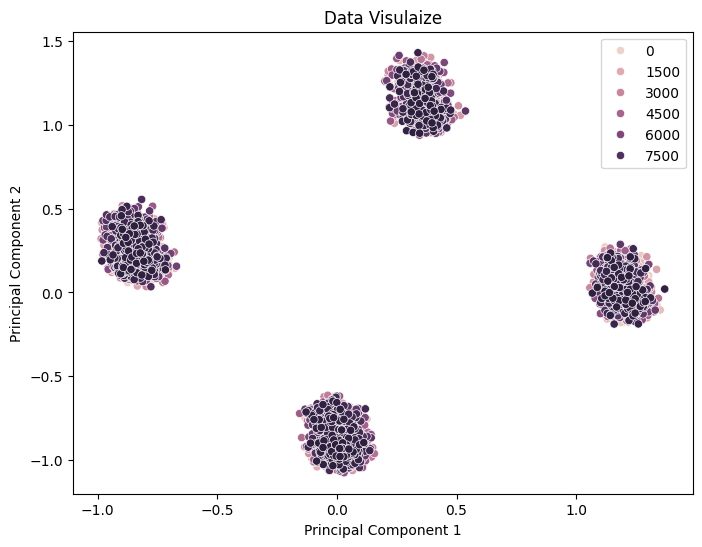

In [ ]:
df_dummies = pd.get_dummies(update_df)
cluster = DBSCAN(eps=0.8, min_samples=1).fit_predict(df_dummies)
print(np.unique(cluster))
pca = PCA(n_components=2)
temp = pca.fit_transform(df_dummies)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=temp[:, 0], y=temp[:, 1], hue=cluster)
plt.title('Data Visulaize')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


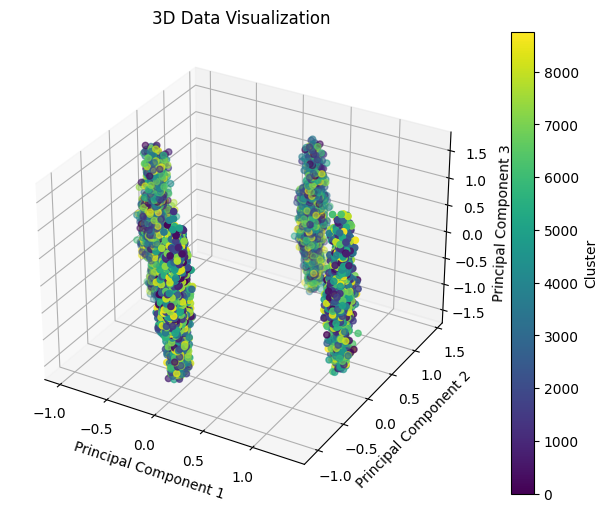

In [ ]:
df_dummies = pd.get_dummies(update_df)
cluster = DBSCAN(eps=0.8, min_samples=1).fit_predict(df_dummies)
pca = PCA(n_components=3)
temp = pca.fit_transform(df_dummies)

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(temp[:, 0], temp[:, 1], temp[:, 2], c=cluster, cmap='viridis')

# Customize the plot
ax.set_title('3D Data Visualization')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

# Add a colorbar
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')

plt.show()

# Part III

### Classification


##### Feature Selection

In [ ]:
df_dummies.info()
for i in range(0, 9):
  df_dummies[df_dummies.columns[i]] = df_dummies[df_dummies.columns[i]].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Sex                                  8763 non-null   bool 
 1   Diabetes                             8763 non-null   bool 
 2   Family History                       8763 non-null   bool 
 3   Smoking                              8763 non-null   bool 
 4   Obesity                              8763 non-null   bool 
 5   Alcohol Consumption                  8763 non-null   bool 
 6   Previous Heart Problems              8763 non-null   bool 
 7   Medication Use                       8763 non-null   bool 
 8   Heart Attack Risk                    8763 non-null   bool 
 9   Age_0-30                             8763 non-null   uint8
 10  Age_30-50                            8763 non-null   uint8
 11  Age_50-70                            8763 non-null   uin

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 70 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Sex                                  8763 non-null   int64
 1   Diabetes                             8763 non-null   int64
 2   Family History                       8763 non-null   int64
 3   Smoking                              8763 non-null   int64
 4   Obesity                              8763 non-null   int64
 5   Alcohol Consumption                  8763 non-null   int64
 6   Previous Heart Problems              8763 non-null   int64
 7   Medication Use                       8763 non-null   int64
 8   Heart Attack Risk                    8763 non-null   int64
 9   Age_0-30                             8763 non-null   uint8
 10  Age_30-50                            8763 non-null   uint8
 11  Age_50-70                            8763 non-null   uin

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#split the dataset to train and test
x = df_dummies.drop('Heart Attack Risk', axis=1)
y = df_dummies['Heart Attack Risk']

x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)
print(f'X_train: {x_train.shape}')
print(f'X_test: {x_test.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_test: {y_test.shape}')


X_train: (7010, 69)
X_test: (1753, 69)
y_train: (7010,)
y_test: (1753,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
selector = SelectKBest(chi2, k=20)
X_selected = selector.fit_transform(x_train, y_train)
best_features = selector.get_support(indices=True)
new_X_train = x_train.iloc[:, best_features]
new_X_test = x_test.iloc[:, best_features]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Decision Tree Classification

In [ ]:
clf = DecisionTreeClassifier()

clf = clf.fit(new_X_train, y_train)

y_pred = clf.predict(new_X_test)
accuracy = accuracy_score(y_test, y_pred)
percision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1score = f1_score(y_test, y_pred, average='macro')
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Percision: {:.4f}%".format(percision * 100))
print("Recall: {:.4f}%".format(percision * 100))
print("F1_Score: {:.4f}%".format(f1score * 100))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 58.5282%
Percision: 49.6289%
Recall: 49.6289%
F1_Score: 47.9592%


#### Random Forest Classification

In [ ]:
rf = RandomForestClassifier(criterion='entropy', max_depth=10, random_state=42)
rf.fit(new_X_train, y_train)
y_pred = rf.predict(new_X_test)
accuracy = accuracy_score(y_test, y_pred)
percision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Percision: {:.4f}%".format(percision * 100))
print("Recall: {:.4f}%".format(percision * 100))
print("F1_Score: {:.4f}%".format(f1score * 100))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 62.5784%
Percision: 62.5784%
Recall: 62.5784%
F1_Score: 62.5784%


#### SVM

In [ ]:
clf = SVC(kernel='linear')
clf.fit(new_X_train, y_train)
y_pred = clf.predict(new_X_test)
accuracy = accuracy_score(y_test, y_pred)
percision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Percision: {:.4f}%".format(percision * 100))
print("Recall: {:.4f}%".format(percision * 100))
print("F1_Score: {:.4f}%".format(f1score * 100))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 64.1757%
Percision: 64.1757%
Recall: 64.1757%
F1_Score: 64.1757%


#### Naive Bayse

In [ ]:
model = GaussianNB()
model.fit(new_X_train, y_train)
y_pred = model.predict(new_X_test)
accuracy = accuracy_score(y_test, y_pred)
percision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Percision: {:.4f}%".format(percision * 100))
print("Recall: {:.4f}%".format(percision * 100))
print("F1_Score: {:.4f}%".format(f1score * 100))

Accuracy: 58.9276%
Percision: 58.9276%
Recall: 58.9276%
F1_Score: 58.9276%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)




#### Logistic Regression

In [ ]:
logreg = LogisticRegression(solver='liblinear', random_state=42)
logreg.fit(new_X_train, y_train)
y_pred = logreg.predict(new_X_test)
accuracy = accuracy_score(y_test, y_pred)
percision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Percision: {:.4f}%".format(percision * 100))
print("Recall: {:.4f}%".format(percision * 100))
print("F1_Score: {:.4f}%".format(f1score * 100))


Accuracy: 64.1757%
Percision: 64.1757%
Recall: 64.1757%
F1_Score: 64.1757%


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#### Ada Boost

In [ ]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(new_X_train, y_train)
y_pred = model.predict(new_X_test)
accuracy = accuracy_score(y_test, y_pred)
percision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1score = f1_score(y_test, y_pred, average='micro')
print("Accuracy: {:.4f}%".format(accuracy * 100))
print("Percision: {:.4f}%".format(percision * 100))
print("Recall: {:.4f}%".format(percision * 100))
print("F1_Score: {:.4f}%".format(f1score * 100))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 64.1757%
Percision: 64.1757%
Recall: 64.1757%
F1_Score: 64.1757%
